<a href="https://colab.research.google.com/github/ashutosh-619/The-Sparks-Foundation-Internship/blob/main/Task_2_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction using Unsupervised ML**

Author: Ashutosh Pandey

Goal: From the given Iris dataset, predict the optimum number of clusters and represent it visually.

We will perform the task of clustering by the simple **K-means algorithm**.

In [ ]:
#We start by importing some basic libraries.
import numpy as np                        #for data handling and linear algebra
import pandas as pd                       #to deal with dataframes
import matplotlib.pyplot as plt           #for data visualization

In [ ]:
#Now we import the Iris dataset's csv file using the read_csv function
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#We do not require the ID and the Species column as well, since we ourselves are going to form the clusters to group similar features into one group.
X = df.iloc[:, [1,2,3,4]].values
type(X)

numpy.ndarray

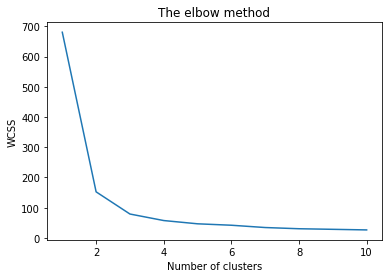

In [ ]:
#Now we will try to find the optimum value for K. We know it will be 3 since there are 3 kinds of species in the dataset.
from sklearn.cluster import KMeans

#wcss is a list that will store the within cluster sum of squares.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 59)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  
#The above loop tries out various values for the number of clusters.
#We now plot the results using a line plot.

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#The above method is also known as the elbow method because as we can see, the graph looks like a human elbow.
#The optimum number of cluster is the point where the elbow occurs, in this case, at k=3.
#Thus we choose this value of K and proceed forward.

In [ ]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 59)
y_kmeans = model.fit_predict(X)

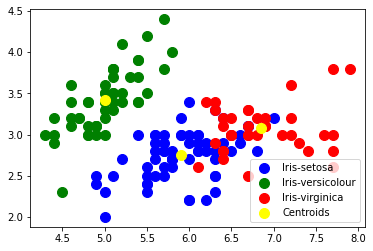

In [ ]:
#Next we visualize the clusters with the help of matplotlib.
#We label the points with their respective speices and give them different colors.

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

#We also plot the centroid of the clusters as it is the main aspect that decides the classes of the data points.
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
#Thus, we can observe that we have successfully divided the dataset into three clusters.